In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = "data/clean_hockey_data.csv"
nhl_df = pd.read_csv(file)

In [3]:
nhl_df.head()

,Unnamed: 0,Rk,Player,ID,Age,Pos,Tm,GP,G,A,...,FOL,FO_percent,HART,Votes,Season,G/60min,A/60min,PTS/60min,HIT/60min,BLK/60min
0,0,1,Connor McDavid,mcdavco01,20,C,EDM,82.0,30,70,...,458.0,43.2,1,1604,2017,1.038661,2.423543,3.462204,1.177149,1.004039
1,1,2,Sidney Crosby,crosbsi01,29,C,PIT,75.0,44,45,...,906.0,48.2,0,1104,2017,1.770624,1.810865,3.581489,3.219316,1.086519
2,2,3,Patrick Kane,kanepa01,28,RW,CHI,82.0,34,55,...,44.0,13.7,0,206,2017,1.163056,1.881414,3.044470,0.957811,0.513113
3,3,4,Nicklas Backstrom,backsni02,29,C,WSH,82.0,23,63,...,648.0,51.4,0,60,2017,0.921844,2.525050,3.446894,1.803607,1.322645
4,4,5,Nikita Kucherov,kucheni01,23,RW,TBL,74.0,40,45,...,0.0,0.0,0,119,2017,1.668985,1.877608,3.546592,1.251739,0.834492


In [4]:
# Pass in a df and a category, and the function will produce a new df grouped by that category and displaying 
# the average (or median) of each category
def groupby_avg(df, category):
    # Groups the df by a category
    temp_df = df.groupby([category])

    # Calculates the average stats for each group
    avg_goals = temp_df["G/60min"].mean()
    avg_assists = temp_df["A/60min"].mean()
    avg_pts = temp_df["PTS/60min"].mean()
    avg_hits = temp_df["HIT/60min"].mean()
    avg_blocks = temp_df["BLK/60min"].mean()
    avg_shootperc = temp_df["S_percent"].mean()
    count = temp_df["Player"].count()

    # Builds the new df
    new_df = pd.DataFrame({
        "Avg G/60min" : avg_goals,
        "Avg A/60min" : avg_assists,
        "Avg PTS/60min" : avg_pts,
        "Avg HIT/60min" : avg_hits,
        "Avg BLK/60min" : avg_blocks,
        "Avg S_percent" : avg_shootperc,
        "Num Players" : count
    })
    return new_df


def groupby_median(df, category):
    temp_df = df.groupby([category])

    med_goals = temp_df["G/60min"].median()
    med_assists = temp_df["A/60min"].median()
    med_pts = temp_df["PTS/60min"].median()
    med_hits = temp_df["HIT/60min"].median()
    med_blocks = temp_df["BLK/60min"].median()
    med_shhotperc = temp_df["S_percent"].median()
    count = temp_df["Player"].count()


    new_df = pd.DataFrame({
        "Med G/60min" : med_goals,
        "Med A/60min" : med_assists,
        "Med PTS/60min" : med_pts,
        "Med HIT/60min" : med_hits,
        "Med BLK/60min" : med_blocks,
        "Num Players" : count
    })
    return new_df

In [5]:
# Df grouping by 2 categories
def multi_groupby_med(df, category1, category2):
    temp_df = df.groupby([category1, category2])

    med_goals = temp_df["G/60min"].median()
    med_assists = temp_df["A/60min"].median()
    med_pts = temp_df["PTS/60min"].median()
    med_hits = temp_df["HIT/60min"].median()
    med_blocks = temp_df["BLK/60min"].median()
    count = temp_df["Age"].count()

    new_df = pd.DataFrame({
        "Med G/60min" : med_goals,
        "Med A/60min" : med_assists,
        "Med PTS/60min" : med_pts,
        "Med HIT/60min" : med_hits,
        "Med BLK/60min" : med_blocks,
        "Num Players" : count
    })
    return new_df

def multi_groupby_avg(df, category1, category2):
    temp_df = df.groupby([category1, category2])

    avg_goals = temp_df["G/60min"].mean()
    avg_assists = temp_df["A/60min"].mean()
    avg_pts = temp_df["PTS/60min"].mean()
    avg_hits = temp_df["HIT/60min"].mean()
    avg_blocks = temp_df["BLK/60min"].mean()
    count = temp_df["Age"].count()

    new_df = pd.DataFrame({
        "Avg G/60min" : avg_goals,
        "Avg A/60min" : avg_assists,
        "Avg PTS/60min" : avg_pts,
        "Avg HIT/60min" : avg_hits,
        "Avg BLK/60min" : avg_blocks,
        "Avg Players" : count
    })
    return new_df

In [43]:
def seasonyears_filter(df, years_list):
    new_df = df[df.Season.isin(years_list)]
    return new_df

# Groups a df into 3 sets of 3 years
def three_year_group(df):
    years = [2004, 2005, 2006, 2009, 2010, 2011, 2016, 2017, 2018]
    new_df = df[df.Season.isin(years)]

    bins = [2004, 2006, 2011, 2018]
    groups = ["2004-06", "2009-11", "2016-18"]
    new_df["Season_group"] = pd.cut(new_df["Season"], bins, labels=groups, include_lowest=True)
    # grouped_df = multi_groupby_avg(new_df, "Age", "Season_group")
    return new_df

In [6]:
# Data split by position
forwards_data = nhl_df[(nhl_df["Pos"] != "D") & (nhl_df["Age"] >= 20)]
defensemen_data = nhl_df[(nhl_df["Pos"] == "D") & (nhl_df["Age"] >= 20)]

# Data for only younger players. Exlcuding 18/19 yr olds because of how few there are and their tendency to be superstars
young_df = forwards_data[(forwards_data["Age"] <= 22) & (forwards_data["Age"] >= 20)]

#
ssn18_df = forwards_data[forwards_data["Season"] == 2018]
ssn04_df = forwards_data[forwards_data["Season"] == 24]

# Isolate 2004, 2011, 2018
season_split_df = forwards_data[(forwards_data["Season"] == 2004) | (forwards_data["Season"] == 2011) | (forwards_data["Season"] == 2018)]

Text(0.5, 1.0, 'Age 20-22')

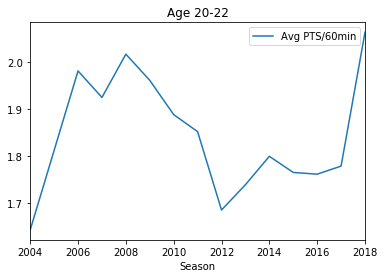

In [7]:
youth_by_season_df = groupby_avg(young_df, "Season")
youth_by_season_df.plot(kind="line", y = "Avg PTS/60min")
plt.title("Age 20-22")

Text(0.5, 1.0, 'Forwards')

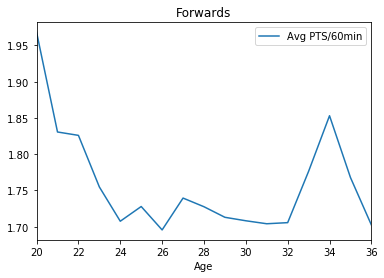

In [8]:
age_groupings_df = groupby_avg(forwards_data, "Age")
age_groupings_df.plot(kind="line", y = "Avg PTS/60min")
plt.title("Forwards")

Text(0.5, 1.0, 'Defensemen')

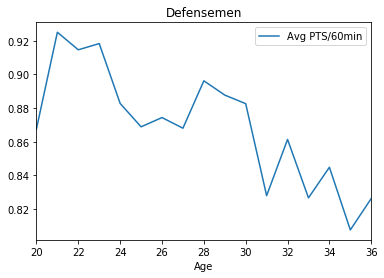

In [9]:
d_age_groupings_df = groupby_avg(defensemen_data, "Age")
d_age_groupings_df.plot(kind="line", y = "Avg PTS/60min")
plt.title("Defensemen")

# Grouping by Age and Season

Text(0.5, 1.0, 'Forwards - Median')

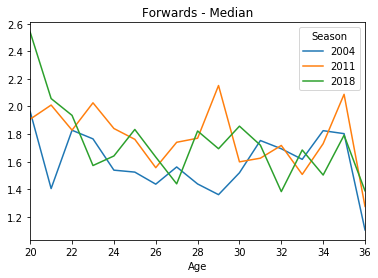

In [12]:
new_df = multi_groupby_med(season_split_df, "Age", "Season")
new_df.unstack("Season").plot(kind="line", y = "Med PTS/60min")
plt.title("Forwards - Median")

Text(0.5, 1.0, 'Forwards Avg')

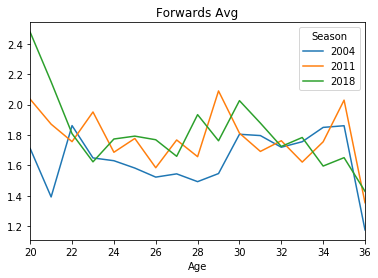

In [13]:
new_df = multi_groupby_avg(season_split_df, "Age", "Season")
new_df.unstack("Season").plot(kind="line", y = "Avg PTS/60min")
plt.title("Forwards Avg")

Text(0.5, 1.0, 'Forwards')

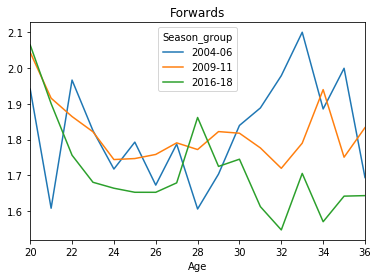

In [48]:
new_df = three_year_group(forwards_data)
new_df = multi_groupby_avg(new_df, "Age", "Season_group")
new_df.unstack("Season_group").plot(kind="line", y = "Avg PTS/60min")
plt.title("Forwards")

Text(0.5, 1.0, 'Defensemen')

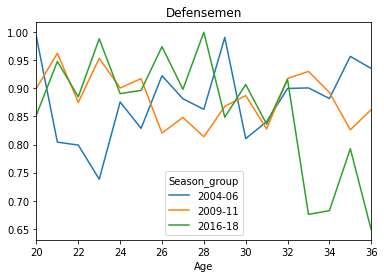

In [45]:
new_df = three_year_group(defensemen_data)
new_df = multi_groupby_avg(new_df, "Age", "Season_group")
new_df.unstack("Season_group").plot(kind="line", y = "Avg PTS/60min")
plt.title("Defensemen - Avg")

Text(0.5, 1.0, 'Defensemen - Median')

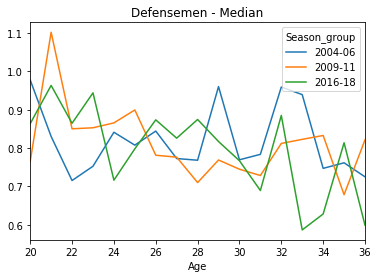

In [46]:
new_df = three_year_group(defensemen_data)
new_df = multi_groupby_med(new_df, "Age", "Season_group")
new_df.unstack("Season_group").plot(kind="line", y = "Med PTS/60min")
plt.title("Defensemen - Median")